In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression,LogisticRegressionCV, LassoCV
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
mid_df = pd.read_csv('data/midfielder.csv')

In [5]:
mid_df.head()

,Unnamed: 0,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,positions,Category
0,58,Claudio Marchisio,Italy,Juventus,Sub,8.0,06/01/2007,2020.0,86,180 cm,75 kg,Right,01/19/1986,31,CM/CDM,High / High,4,4,85,84,72,78,78,78,86,82,82,84,84,76,87,85,79,79,83,71,79,81,67,68,82,65,82,78,78,78,76,2,4,4,3,4,CM/CDM,4
1,70,İlkay Gündoğan,Germany,Manchester City,Sub,8.0,07/01/2016,2020.0,85,180 cm,80 kg,Right,10/24/1990,26,CM/CDM,High / Medium,4,4,88,87,57,64,64,68,87,77,79,87,86,74,90,83,77,74,73,74,83,85,62,49,77,69,74,81,74,76,75,5,11,5,14,13,CM/CDM,4
2,136,Casemiro,Brazil,Real Madrid,Sub,14.0,07/11/2013,2021.0,83,184 cm,80 kg,Right,02/23/1992,25,CDM,Medium / High,3,2,77,69,79,85,86,87,78,66,84,72,73,52,80,82,59,62,85,82,57,66,87,74,86,59,75,59,74,66,53,12,13,16,14,12,CDM,3
3,216,Granit Xhaka,Switzerland,Arsenal,Sub,29.0,07/01/2016,2021.0,82,185 cm,82 kg,Left,09/27/1992,24,CDM/CM,Medium / Medium,4,3,80,70,71,68,75,90,83,77,76,86,73,68,85,89,48,54,79,76,62,55,40,62,88,49,85,68,70,59,50,7,7,11,8,13,CDM/CM,3
4,221,Grzegorz Krychowiak,Poland,PSG,Sub,4.0,07/03/2016,2021.0,82,186 cm,85 kg,Right,01/29/1990,27,CDM,Medium / High,3,2,75,63,75,72,85,89,77,52,81,71,83,59,79,83,65,71,77,92,52,59,75,83,81,42,70,46,62,78,40,6,15,8,14,7,CDM,3


In [6]:
mid_df.columns

Index(['Unnamed: 0', 'Name', 'Nationality', 'Club', 'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry', 'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age', 'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'positions', 'Category'], dtype='object')

In [7]:
mid_lr = mid_df.drop(['Unnamed: 0','Height', 'Weight','Nationality','Club','Club_Position',
       'Club_Kit', 'Club_Joining', 'Contract_Expiry','Preffered_Foot','Category',
       'Birth_Date','Preffered_Position','GK_Positioning',
       'GK_Diving', 'GK_Kicking', 'GK_Handling','GK_Reflexes',], 
        axis = 1)

In [9]:
mid_lr.columns

Index(['Name', 'Rating', 'Age', 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'positions'], dtype='object')

In [10]:
corr = pd.DataFrame(mid_lr.corr())

In [11]:
corr.sort_values('Rating', ascending = False, inplace = True)

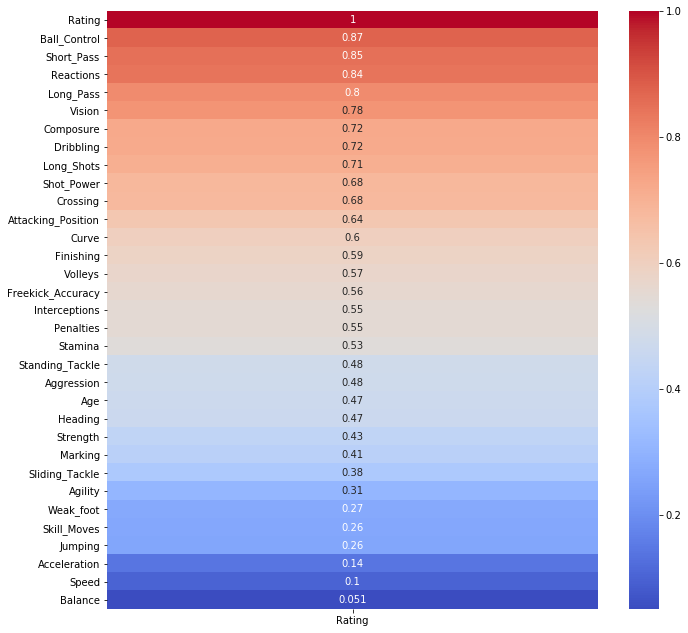

In [12]:
plt.figure(figsize=(11,11))
sns.heatmap(corr[['Rating']],annot = True, cmap='coolwarm');

In [13]:
corr

,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
Rating,1.000000,0.469043,0.270600,0.263572,0.874839,0.720561,0.412458,0.375932,0.479739,0.476783,0.842655,0.636014,0.550799,0.775469,0.724880,0.678936,0.850427,0.795244,0.141337,0.102491,0.532928,0.432232,0.050863,0.308645,0.262168,0.465179,0.682793,0.586064,0.710292,0.602123,0.559765,0.548441,0.570389
Ball_Control,0.874839,0.346346,0.300986,0.362617,1.000000,0.825385,0.215183,0.192530,0.284114,0.277776,0.714430,0.657530,0.348253,0.788843,0.677031,0.685191,0.806401,0.748963,0.188411,0.128129,0.356050,0.258988,0.132135,0.377212,0.142167,0.293556,0.636685,0.629351,0.697729,0.663826,0.587808,0.559599,0.616980
Short_Pass,0.850427,0.339011,0.275403,0.241814,0.806401,0.661579,0.346897,0.353397,0.433970,0.362409,0.694637,0.565610,0.459078,0.748659,0.631691,0.626448,1.000000,0.869938,0.051319,0.010697,0.349164,0.276292,0.080865,0.231809,0.137300,0.344983,0.607970,0.496672,0.613612,0.571544,0.537216,0.503080,0.505908
Reactions,0.842655,0.492707,0.228111,0.187172,0.714430,0.566577,0.413804,0.381955,0.466415,0.475914,1.000000,0.566509,0.557507,0.652224,0.658867,0.563323,0.694637,0.660946,0.081488,0.033656,0.479875,0.399375,0.024587,0.232814,0.253494,0.443078,0.591692,0.472435,0.594735,0.492990,0.459234,0.466734,0.492901
Long_Pass,0.795244,0.372055,0.253745,0.180934,0.748963,0.598972,0.402520,0.408383,0.478824,0.386819,0.660946,0.514785,0.498867,0.723334,0.614109,0.627053,0.869938,1.000000,-0.017701,-0.045895,0.344443,0.306202,0.028996,0.179115,0.127979,0.342419,0.600730,0.453148,0.611656,0.565347,0.541361,0.482911,0.487340
Vision,0.775469,0.368937,0.313540,0.366208,0.788843,0.721220,0.131129,0.112176,0.204303,0.204046,0.652224,0.685866,0.277470,1.000000,0.671998,0.696086,0.748659,0.723334,0.123212,0.067040,0.293209,0.181215,0.152545,0.347088,0.081068,0.209889,0.581592,0.623673,0.680462,0.691644,0.645457,0.562661,0.603340
Composure,0.724880,0.485099,0.262912,0.233897,0.677031,0.560690,0.300354,0.265635,0.338510,0.367475,0.658867,0.543613,0.391036,0.671998,1.000000,0.579706,0.631691,0.614109,0.064806,0.023699,0.345818,0.352625,0.078624,0.237961,0.184381,0.334060,0.574967,0.495082,0.589820,0.551021,0.509569,0.499094,0.543154
Dribbling,0.720561,0.203028,0.292243,0.486709,0.825385,1.000000,-0.000109,-0.009470,0.056179,0.100372,0.566577,0.685005,0.113674,0.721220,0.560690,0.666104,0.661579,0.598972,0.361092,0.299917,0.249048,0.087413,0.243619,0.477757,0.102317,0.170521,0.570696,0.678945,0.654109,0.665158,0.562698,0.544813,0.636001
Long_Shots,0.710292,0.435938,0.266608,0.310822,0.697729,0.654109,0.150605,0.114862,0.203819,0.259525,0.594735,0.665087,0.287141,0.680462,0.589820,0.668075,0.613612,0.611656,0.136535,0.105706,0.340441,0.290536,0.054818,0.298886,0.143159,0.290816,0.781449,0.710382,1.000000,0.669574,0.672379,0.601984,0.676642
Shot_Power,0.682793,0.396886,0.227634,0.229121,0.636685,0.570696,0.223718,0.216012,0.282462,0.376689,0.591692,0.580895,0.331842,0.581592,0.574967,0.596169,0.607970,0.600730,0.098966,0.087180,0.358348,0.383735,0.003704,0.191541,0.182051,0.400344,1.000000,0.591183,0.781449,0.591549,0.588737,0.580406,0.636083


In [29]:
# mid_rating_features = ['Ball_Control','Short_Pass','Reactions','Long_Pass',
#                         'Vision','Composure', 'Dribbling','Long_Shots','Shot_Power',
#                         'Attacking_Position','Crossing','Curve','Finishing',
#                         'Freekick_Accuracy','Interceptions','Volleys','Penalties',
#                         'Stamina','Standing_Tackle','Speed','Balance','Age','Marking',
#                         'Acceleration']

mid_rating_features = ['Ball_Control','Short_Pass','Reactions','Long_Pass',
                       'Vision','Dribbling','Long_Shots','Shot_Power',
                       'Attacking_Position','Crossing','Freekick_Accuracy','Heading']

In [30]:
X_mid_lr = mid_df[mid_rating_features]

y_mid_lr = mid_df[['Rating']]

X_mid_train, X_mid_test, y_mid_train, y_mid_test = train_test_split(X_mid_lr,
                                                    y_mid_lr,
                                                    test_size=0.30, 
                                                    random_state=77)

In [31]:
lr_mid = LinearRegression()

lr_mid.fit(X_mid_train, y_mid_train)

print(f' CV: {cross_val_score(lr_mid, X_mid_train, y_mid_train, cv = 5).mean()}')
print(f' Train: {lr_mid.score(X_mid_train, y_mid_train)}')
print(F' Test: {lr_mid.score(X_mid_test, y_mid_test)}')

 CV: 0.9054333085258929
 Train: 0.9069181757782612
 Test: 0.9016335016588742
